In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


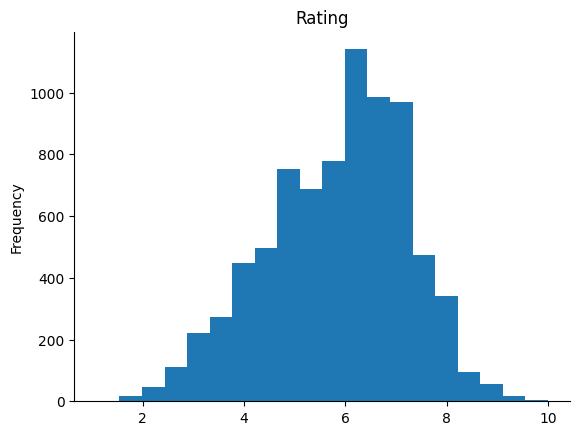

In [ ]:
from matplotlib import pyplot as plt
df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

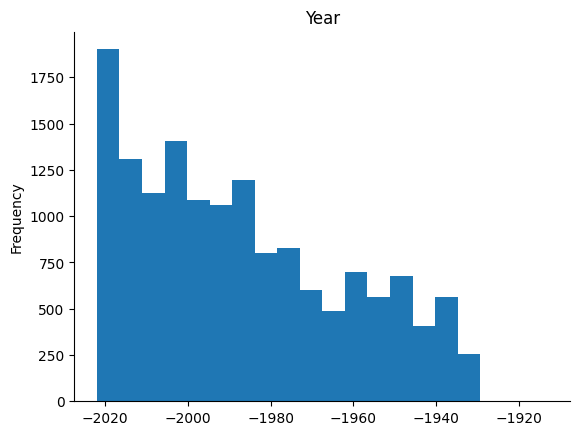

In [ ]:
from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [ ]:
df.dtypes

,0
Name,object
Year,float64
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [ ]:
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.dropna(subset=['Rating'], inplace=True)

In [ ]:
df.isna().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
df['Genre'] = df['Genre'].fillna('Unknown')

In [ ]:
df.isna().sum()

,0
Name,0
Year,0
Duration,2068
Genre,0
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
negative_years = df[df['Year'] < 0]
print(f"Number of rows with negative years: {len(negative_years)}")
display(negative_years.head())

Number of rows with negative years: 7919


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df['Year'] = df['Year'].abs()
df['Year'] = df['Year'].astype(int)
print("Converted negative years to positive and cast to integer.")
display(df.head())

Converted negative years to positive and cast to integer.


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
print(df['Year'].dtypes)

int64


In [ ]:
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'])
print("Converted 'Votes' column to numeric.")
display(df.head())

Converted 'Votes' column to numeric.


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df.dtypes

,0
Name,object
Year,int64
Duration,object
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [ ]:
df.drop(['Name', 'Duration', 'Actor 3'], axis=1, inplace=True)
display(df.head())

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2
1,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
3,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj
5,1997,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
6,2005,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba
8,2012,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad


In [ ]:
df = pd.get_dummies(data=df,columns=['Director'])

In [ ]:
df = pd.get_dummies(data=df,columns=['Genre'])

In [ ]:
df = pd.get_dummies(data=df,columns=['Actor 1'])

In [ ]:
df = pd.get_dummies(data=df,columns=['Actor 2'])

In [ ]:
df.head()

,Year,Rating,Votes,Director_A. Bhimsingh,Director_A. Jagannathan,Director_A. Kodandarami Reddy,Director_A. Majid,Director_A. Muthu,Director_A. Salaam,Director_A. Shamsheer,...,Actor 2_Zeenat Aman,Actor 2_Zeenat Ibrahim,Actor 2_Zeeshan Khan,Actor 2_Zhangke Jia,Actor 2_Zia Mohiyuddin Dagar,Actor 2_Zoa Morani,Actor 2_Zoya Afroz,Actor 2_Zoya Hussain,Actor 2_Zubeida,Actor 2_Zuber K. Khan
1,2019,7.0,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019,4.4,35,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997,4.7,827,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2005,7.4,1086,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2012,5.6,326,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
X = df.drop(columns=['Rating'])
Y = df['Rating']

print("X and Y defined successfully.")

X and Y defined successfully.


In [ ]:
X.head()

,Year,Votes,Director_A. Bhimsingh,Director_A. Jagannathan,Director_A. Kodandarami Reddy,Director_A. Majid,Director_A. Muthu,Director_A. Salaam,Director_A. Shamsheer,Director_A. Veerappan,...,Actor 2_Zeenat Aman,Actor 2_Zeenat Ibrahim,Actor 2_Zeeshan Khan,Actor 2_Zhangke Jia,Actor 2_Zia Mohiyuddin Dagar,Actor 2_Zoa Morani,Actor 2_Zoya Afroz,Actor 2_Zoya Hussain,Actor 2_Zubeida,Actor 2_Zuber K. Khan
1,2019,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019,35,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997,827,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2005,1086,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2012,326,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
X_train

,Year,Votes,Director_A. Bhimsingh,Director_A. Jagannathan,Director_A. Kodandarami Reddy,Director_A. Majid,Director_A. Muthu,Director_A. Salaam,Director_A. Shamsheer,Director_A. Veerappan,...,Actor 2_Zeenat Aman,Actor 2_Zeenat Ibrahim,Actor 2_Zeeshan Khan,Actor 2_Zhangke Jia,Actor 2_Zia Mohiyuddin Dagar,Actor 2_Zoa Morani,Actor 2_Zoya Afroz,Actor 2_Zoya Hussain,Actor 2_Zubeida,Actor 2_Zuber K. Khan
7697,2014,68,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13587,2003,136,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7235,2009,6741,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3089,1993,53,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8045,2013,55,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10137,2016,21470,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10449,1970,79,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1527,1984,65,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14938,1998,144,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_model = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_model.fit(X_train, Y_train)
print("RandomForestRegressor model fitted successfully.")

RandomForestRegressor model fitted successfully.


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = regressor_model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.2562919503367005
R-squared (R2): 0.34007864432459245


In [3]:
import pandas as pd

movie = {'Year': 2020,
         'Votes': 140,
         'Actor 1_Rasika Dugal': 0,
         'Actor 1_Prateik': 1,
         'Actor 1_Bobby Deol': 0,
         'Actor 1_Jimmy Sheirgill': 0,
         'Actor 1_Yash Dave': 0,
         'Director_Ovais Khan': 0,
         'Director_Rahul Rawail': 1,
         'Actor 2_Vivek Ghamande': 1
        }

movie_df = pd.DataFrame([movie])

movie_df = movie_df.reindex(columns=X_train.columns, fill_value=0)

display(movie_df)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
regressor_model.predict(movie_df)

array([5.173])